# Cotton Leaf Disease Prediction

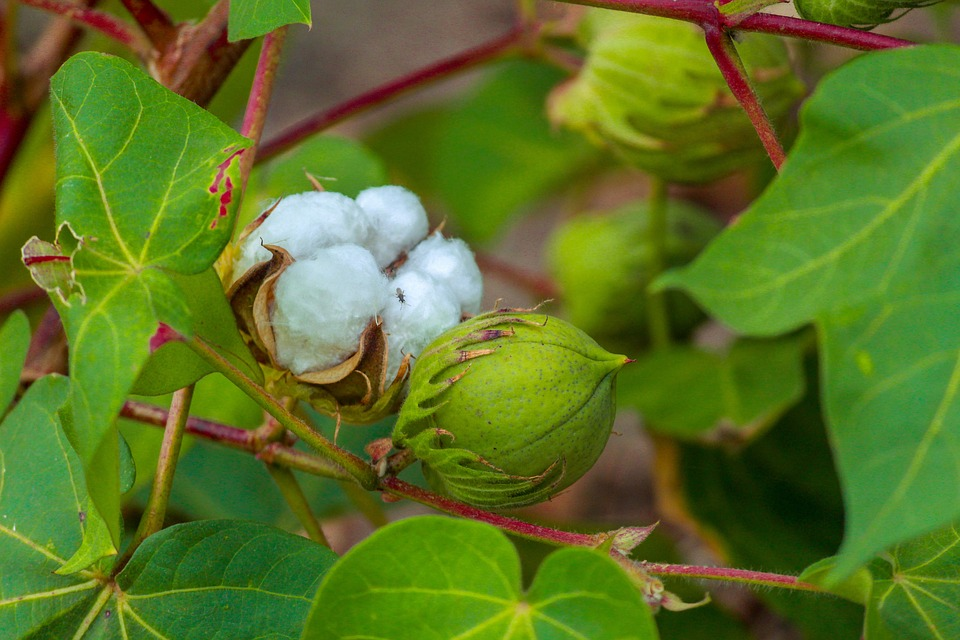

Cotton Disease Dataset - https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img

<function keras.utils.image_utils.load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest', keep_aspect_ratio=False)>

In [2]:
# cheking the version of keras
keras.__version__

'2.10.0'

## Load Data

In [3]:
train_data_path=("C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/Leaf deseases/archive/Cotton Disease/train")
validation_data_path=("C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/Leaf deseases/archive/Cotton Disease/val")

In [4]:
# Show augmented images 
def plotImages(images_arr):
    fig,axes=plt.subplots(1,5,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
  

In [6]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [7]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [8]:
# This is the augmentation configuration we will use for validation
# only for rescaling
valid_datagen=ImageDataGenerator(rescale=1./255)

# This is a similar generator ,for validation data
valid_data=valid_datagen.flow_from_directory(validation_data_path,
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary')

Found 253 images belonging to 4 classes.


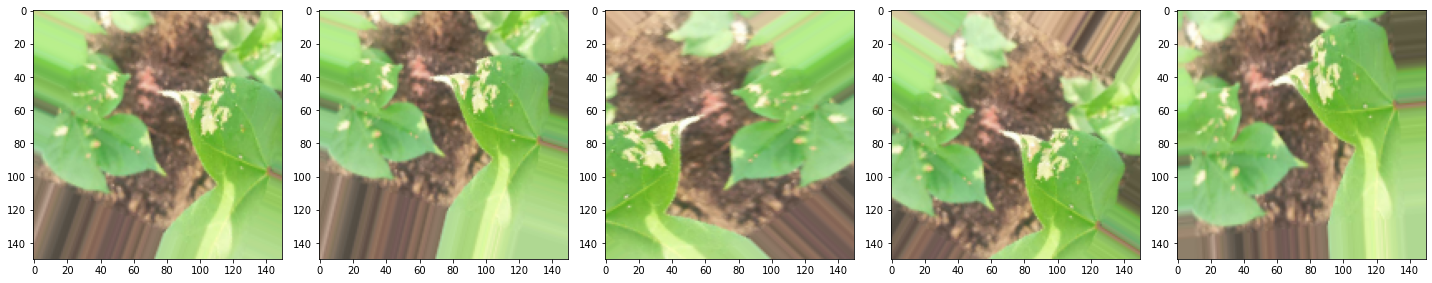

In [10]:
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

In [29]:
# Save the best model using vall accuracy
model_path="C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/Leaf deseases/archive/Cotton Disease/v4_pred_cott_dis.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Building CNN model

In [30]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [31]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# summer of model
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [33]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2688 - accuracy: 0.4377
Epoch 1: val_accuracy improved from -inf to 0.44664, saving model to C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/Leaf deseases/archive/Cotton Disease\v4_pred_cott_dis.h5
61/61 [==============================] - 76s 1s/step - loss: 1.2688 - accuracy: 0.4377 - val_loss: 1.1082 - val_accuracy: 0.4466
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0382 - accuracy: 0.5607
Epoch 2: val_accuracy improved from 0.44664 to 0.48617, saving model to C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/Leaf deseases/archive/Cotton Disease\v4_pred_cott_dis.h5
61/61 [==============================] - 58s 946ms/step - loss: 1.0382 - accuracy: 0.5607 - val_loss: 1.0680 - val_accuracy: 0.4862
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.6064
Epoch 3: val_accuracy improved from 0.48617 to 0.71146, saving model to C:/Users/Pranav/Desktop/D

Epoch 26/500
61/61 [==============================] - ETA: 0s - loss: 0.4455 - accuracy: 0.8344
Epoch 26: val_accuracy did not improve from 0.88538
61/61 [==============================] - 45s 737ms/step - loss: 0.4455 - accuracy: 0.8344 - val_loss: 0.5456 - val_accuracy: 0.7708
Epoch 27/500
61/61 [==============================] - ETA: 0s - loss: 0.4346 - accuracy: 0.8380
Epoch 27: val_accuracy did not improve from 0.88538
61/61 [==============================] - 45s 740ms/step - loss: 0.4346 - accuracy: 0.8380 - val_loss: 0.2877 - val_accuracy: 0.8775
Epoch 28/500
61/61 [==============================] - ETA: 0s - loss: 0.3774 - accuracy: 0.8616
Epoch 28: val_accuracy did not improve from 0.88538
61/61 [==============================] - 45s 741ms/step - loss: 0.3774 - accuracy: 0.8616 - val_loss: 0.3703 - val_accuracy: 0.8458
Epoch 29/500
61/61 [==============================] - ETA: 0s - loss: 0.4261 - accuracy: 0.8370
Epoch 29: val_accuracy did not improve from 0.88538
61/61 [=====

61/61 [==============================] - 45s 739ms/step - loss: 0.2809 - accuracy: 0.8975 - val_loss: 0.1597 - val_accuracy: 0.9526
Epoch 54/500
61/61 [==============================] - ETA: 0s - loss: 0.2730 - accuracy: 0.8954
Epoch 54: val_accuracy did not improve from 0.95257
61/61 [==============================] - 48s 783ms/step - loss: 0.2730 - accuracy: 0.8954 - val_loss: 0.1969 - val_accuracy: 0.9289
Epoch 55/500
61/61 [==============================] - ETA: 0s - loss: 0.3090 - accuracy: 0.8847
Epoch 55: val_accuracy did not improve from 0.95257
61/61 [==============================] - 47s 761ms/step - loss: 0.3090 - accuracy: 0.8847 - val_loss: 0.1618 - val_accuracy: 0.9526
Epoch 56/500
61/61 [==============================] - ETA: 0s - loss: 0.3104 - accuracy: 0.8806
Epoch 56: val_accuracy did not improve from 0.95257
61/61 [==============================] - 46s 748ms/step - loss: 0.3104 - accuracy: 0.8806 - val_loss: 0.2106 - val_accuracy: 0.9249
Epoch 57/500
61/61 [========

61/61 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.8970
Epoch 82: val_accuracy did not improve from 0.96838
61/61 [==============================] - 42s 680ms/step - loss: 0.2648 - accuracy: 0.8970 - val_loss: 0.1471 - val_accuracy: 0.9605
Epoch 83/500
61/61 [==============================] - ETA: 0s - loss: 0.2370 - accuracy: 0.9062
Epoch 83: val_accuracy did not improve from 0.96838
61/61 [==============================] - 42s 682ms/step - loss: 0.2370 - accuracy: 0.9062 - val_loss: 0.2166 - val_accuracy: 0.9368
Epoch 84/500
61/61 [==============================] - ETA: 0s - loss: 0.2284 - accuracy: 0.9139
Epoch 84: val_accuracy improved from 0.96838 to 0.97628, saving model to C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/Leaf deseases/archive/Cotton Disease\v4_pred_cott_dis.h5
61/61 [==============================] - 42s 691ms/step - loss: 0.2284 - accuracy: 0.9139 - val_loss: 0.0928 - val_accuracy: 0.9763
Epoch 85/500
61/61 [========================

61/61 [==============================] - ETA: 0s - loss: 0.2100 - accuracy: 0.9221
Epoch 110: val_accuracy did not improve from 0.98024
61/61 [==============================] - 43s 701ms/step - loss: 0.2100 - accuracy: 0.9221 - val_loss: 0.1096 - val_accuracy: 0.9644
Epoch 111/500
61/61 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.9329
Epoch 111: val_accuracy did not improve from 0.98024
61/61 [==============================] - 43s 707ms/step - loss: 0.1899 - accuracy: 0.9329 - val_loss: 0.1049 - val_accuracy: 0.9684
Epoch 112/500
61/61 [==============================] - ETA: 0s - loss: 0.2012 - accuracy: 0.9262
Epoch 112: val_accuracy did not improve from 0.98024
61/61 [==============================] - 42s 690ms/step - loss: 0.2012 - accuracy: 0.9262 - val_loss: 0.1006 - val_accuracy: 0.9684
Epoch 113/500
61/61 [==============================] - ETA: 0s - loss: 0.1934 - accuracy: 0.9247
Epoch 113: val_accuracy did not improve from 0.98024
61/61 [===========

61/61 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9421
Epoch 139: val_accuracy did not improve from 0.98024
61/61 [==============================] - 42s 687ms/step - loss: 0.1720 - accuracy: 0.9421 - val_loss: 0.1049 - val_accuracy: 0.9644
Epoch 140/500
61/61 [==============================] - ETA: 0s - loss: 0.1790 - accuracy: 0.9344
Epoch 140: val_accuracy did not improve from 0.98024
61/61 [==============================] - 42s 687ms/step - loss: 0.1790 - accuracy: 0.9344 - val_loss: 0.1537 - val_accuracy: 0.9328
Epoch 141/500
61/61 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 0.9349
Epoch 141: val_accuracy did not improve from 0.98024
61/61 [==============================] - 42s 681ms/step - loss: 0.1794 - accuracy: 0.9349 - val_loss: 0.0802 - val_accuracy: 0.9684
Epoch 142/500
61/61 [==============================] - ETA: 0s - loss: 0.1460 - accuracy: 0.9534
Epoch 142: val_accuracy did not improve from 0.98024
61/61 [===========

Epoch 168/500
61/61 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9441
Epoch 168: val_accuracy did not improve from 0.98814
61/61 [==============================] - 42s 688ms/step - loss: 0.1582 - accuracy: 0.9441 - val_loss: 0.0715 - val_accuracy: 0.9763
Epoch 169/500
61/61 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.9493
Epoch 169: val_accuracy did not improve from 0.98814
61/61 [==============================] - 42s 692ms/step - loss: 0.1390 - accuracy: 0.9493 - val_loss: 0.0951 - val_accuracy: 0.9684
Epoch 170/500
61/61 [==============================] - ETA: 0s - loss: 0.1352 - accuracy: 0.9472
Epoch 170: val_accuracy did not improve from 0.98814
61/61 [==============================] - 41s 677ms/step - loss: 0.1352 - accuracy: 0.9472 - val_loss: 0.1040 - val_accuracy: 0.9605
Epoch 171/500
61/61 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.9482
Epoch 171: val_accuracy did not improve from 0.98814
61/6

61/61 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9544
Epoch 197: val_accuracy did not improve from 0.98814
61/61 [==============================] - 45s 738ms/step - loss: 0.1229 - accuracy: 0.9544 - val_loss: 0.0866 - val_accuracy: 0.9723
Epoch 198/500
61/61 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9585
Epoch 198: val_accuracy did not improve from 0.98814
61/61 [==============================] - 45s 737ms/step - loss: 0.1103 - accuracy: 0.9585 - val_loss: 0.0928 - val_accuracy: 0.9684
Epoch 199/500
61/61 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9487
Epoch 199: val_accuracy did not improve from 0.98814
61/61 [==============================] - 45s 733ms/step - loss: 0.1345 - accuracy: 0.9487 - val_loss: 0.1701 - val_accuracy: 0.9249
Epoch 200/500
61/61 [==============================] - ETA: 0s - loss: 0.1313 - accuracy: 0.9523
Epoch 200: val_accuracy did not improve from 0.98814
61/61 [===========

61/61 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9621
Epoch 226: val_accuracy did not improve from 0.98814
61/61 [==============================] - 45s 736ms/step - loss: 0.1102 - accuracy: 0.9621 - val_loss: 0.0587 - val_accuracy: 0.9644
Epoch 227/500
61/61 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.9590
Epoch 227: val_accuracy did not improve from 0.98814
61/61 [==============================] - 45s 735ms/step - loss: 0.1136 - accuracy: 0.9590 - val_loss: 0.0511 - val_accuracy: 0.9763
Epoch 228/500
61/61 [==============================] - ETA: 0s - loss: 0.1286 - accuracy: 0.9518
Epoch 228: val_accuracy did not improve from 0.98814
61/61 [==============================] - 45s 741ms/step - loss: 0.1286 - accuracy: 0.9518 - val_loss: 0.0794 - val_accuracy: 0.9763
Epoch 229/500
61/61 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.9616
Epoch 229: val_accuracy did not improve from 0.98814
61/61 [===========

61/61 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9518
Epoch 255: val_accuracy did not improve from 0.98814
61/61 [==============================] - 46s 748ms/step - loss: 0.1411 - accuracy: 0.9518 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 256/500
61/61 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9610
Epoch 256: val_accuracy did not improve from 0.98814
61/61 [==============================] - 46s 747ms/step - loss: 0.1102 - accuracy: 0.9610 - val_loss: 0.0687 - val_accuracy: 0.9684
Epoch 257/500
61/61 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9641
Epoch 257: val_accuracy did not improve from 0.98814
61/61 [==============================] - 104s 2s/step - loss: 0.0963 - accuracy: 0.9641 - val_loss: 0.0635 - val_accuracy: 0.9802
Epoch 258/500
61/61 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9682
Epoch 258: val_accuracy did not improve from 0.98814
61/61 [=============

61/61 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9657
Epoch 284: val_accuracy improved from 0.98814 to 0.99209, saving model to C:/Users/Pranav/Desktop/DATA SCIENCE DATA/CVC file/Leaf deseases/archive/Cotton Disease\v4_pred_cott_dis.h5
61/61 [==============================] - 63s 1s/step - loss: 0.0933 - accuracy: 0.9657 - val_loss: 0.0372 - val_accuracy: 0.9921
Epoch 285/500
61/61 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9713
Epoch 285: val_accuracy did not improve from 0.99209
61/61 [==============================] - 63s 1s/step - loss: 0.0879 - accuracy: 0.9713 - val_loss: 0.0595 - val_accuracy: 0.9723
Epoch 286/500
61/61 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9769
Epoch 286: val_accuracy did not improve from 0.99209
61/61 [==============================] - 62s 1s/step - loss: 0.0770 - accuracy: 0.9769 - val_loss: 0.0393 - val_accuracy: 0.9842
Epoch 287/500
61/61 [===========================

Epoch 313/500
61/61 [==============================] - ETA: 0s - loss: 0.0873 - accuracy: 0.9698
Epoch 313: val_accuracy did not improve from 0.99209
61/61 [==============================] - 42s 680ms/step - loss: 0.0873 - accuracy: 0.9698 - val_loss: 0.0494 - val_accuracy: 0.9921
Epoch 314/500
61/61 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9733
Epoch 314: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 679ms/step - loss: 0.0817 - accuracy: 0.9733 - val_loss: 0.0600 - val_accuracy: 0.9763
Epoch 315/500
61/61 [==============================] - ETA: 0s - loss: 0.1012 - accuracy: 0.9626
Epoch 315: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 676ms/step - loss: 0.1012 - accuracy: 0.9626 - val_loss: 0.0886 - val_accuracy: 0.9684
Epoch 316/500
61/61 [==============================] - ETA: 0s - loss: 0.1069 - accuracy: 0.9662
Epoch 316: val_accuracy did not improve from 0.99209
61/6

61/61 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9759
Epoch 342: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 674ms/step - loss: 0.0716 - accuracy: 0.9759 - val_loss: 0.1690 - val_accuracy: 0.9407
Epoch 343/500
61/61 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9723
Epoch 343: val_accuracy did not improve from 0.99209
61/61 [==============================] - 42s 680ms/step - loss: 0.0765 - accuracy: 0.9723 - val_loss: 0.3356 - val_accuracy: 0.8933
Epoch 344/500
61/61 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.9733
Epoch 344: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 674ms/step - loss: 0.0814 - accuracy: 0.9733 - val_loss: 0.1198 - val_accuracy: 0.9605
Epoch 345/500
61/61 [==============================] - ETA: 0s - loss: 0.0901 - accuracy: 0.9708
Epoch 345: val_accuracy did not improve from 0.99209
61/61 [===========

61/61 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9754
Epoch 371: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 674ms/step - loss: 0.0688 - accuracy: 0.9754 - val_loss: 0.0917 - val_accuracy: 0.9605
Epoch 372/500
61/61 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9713
Epoch 372: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 670ms/step - loss: 0.0749 - accuracy: 0.9713 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 373/500
61/61 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9718
Epoch 373: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 676ms/step - loss: 0.0792 - accuracy: 0.9718 - val_loss: 0.0935 - val_accuracy: 0.9565
Epoch 374/500
61/61 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9831
Epoch 374: val_accuracy did not improve from 0.99209
61/61 [===========

61/61 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9790
Epoch 400: val_accuracy did not improve from 0.99209
61/61 [==============================] - 45s 733ms/step - loss: 0.0709 - accuracy: 0.9790 - val_loss: 0.0596 - val_accuracy: 0.9763
Epoch 401/500
61/61 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9785
Epoch 401: val_accuracy did not improve from 0.99209
61/61 [==============================] - 45s 733ms/step - loss: 0.0591 - accuracy: 0.9785 - val_loss: 0.0815 - val_accuracy: 0.9684
Epoch 402/500
61/61 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9780
Epoch 402: val_accuracy did not improve from 0.99209
61/61 [==============================] - 45s 741ms/step - loss: 0.0684 - accuracy: 0.9780 - val_loss: 0.0707 - val_accuracy: 0.9763
Epoch 403/500
61/61 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9821
Epoch 403: val_accuracy did not improve from 0.99209
61/61 [===========

61/61 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9790
Epoch 429: val_accuracy did not improve from 0.99209
61/61 [==============================] - 45s 734ms/step - loss: 0.0608 - accuracy: 0.9790 - val_loss: 0.1431 - val_accuracy: 0.9644
Epoch 430/500
61/61 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9754
Epoch 430: val_accuracy did not improve from 0.99209
61/61 [==============================] - 45s 738ms/step - loss: 0.0679 - accuracy: 0.9754 - val_loss: 0.0449 - val_accuracy: 0.9802
Epoch 431/500
61/61 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.9641
Epoch 431: val_accuracy did not improve from 0.99209
61/61 [==============================] - 179s 3s/step - loss: 0.0974 - accuracy: 0.9641 - val_loss: 0.0527 - val_accuracy: 0.9802
Epoch 432/500
61/61 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9764
Epoch 432: val_accuracy did not improve from 0.99209
61/61 [=============

61/61 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9841
Epoch 458: val_accuracy did not improve from 0.99209
61/61 [==============================] - 105s 2s/step - loss: 0.0468 - accuracy: 0.9841 - val_loss: 0.0826 - val_accuracy: 0.9763
Epoch 459/500
61/61 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9826
Epoch 459: val_accuracy did not improve from 0.99209
61/61 [==============================] - 178s 3s/step - loss: 0.0527 - accuracy: 0.9826 - val_loss: 0.0859 - val_accuracy: 0.9723
Epoch 460/500
61/61 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.9810
Epoch 460: val_accuracy did not improve from 0.99209
61/61 [==============================] - 45s 729ms/step - loss: 0.0497 - accuracy: 0.9810 - val_loss: 0.0898 - val_accuracy: 0.9644
Epoch 461/500
61/61 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9826
Epoch 461: val_accuracy did not improve from 0.99209
61/61 [===============

61/61 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9846
Epoch 487: val_accuracy did not improve from 0.99209
61/61 [==============================] - 43s 697ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.1347 - val_accuracy: 0.9526
Epoch 488/500
61/61 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9790
Epoch 488: val_accuracy did not improve from 0.99209
61/61 [==============================] - 42s 683ms/step - loss: 0.0584 - accuracy: 0.9790 - val_loss: 0.0431 - val_accuracy: 0.9842
Epoch 489/500
61/61 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9810
Epoch 489: val_accuracy did not improve from 0.99209
61/61 [==============================] - 41s 675ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0499 - val_accuracy: 0.9842
Epoch 490/500
61/61 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9862
Epoch 490: val_accuracy did not improve from 0.99209
61/61 [===========

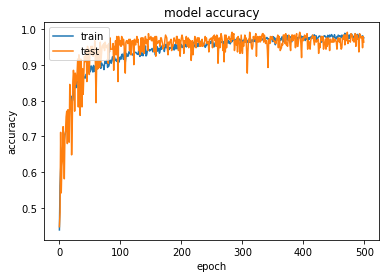

In [34]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

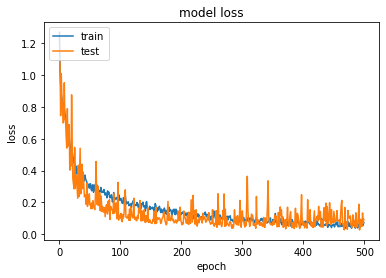

{'loss': [1.2688336372375488,
  1.0382174253463745,
  0.9399334788322449,
  0.8782188296318054,
  0.8565167784690857,
  0.8277315497398376,
  0.8097630143165588,
  0.8257879018783569,
  0.7831937670707703,
  0.760657787322998,
  0.7477927207946777,
  0.7202338576316833,
  0.7021433711051941,
  0.6789880990982056,
  0.6395887136459351,
  0.5959974527359009,
  0.6087911128997803,
  0.5713106393814087,
  0.5617078542709351,
  0.4828241467475891,
  0.5281011462211609,
  0.5135596990585327,
  0.488851398229599,
  0.47723183035850525,
  0.4437423050403595,
  0.44549083709716797,
  0.43455344438552856,
  0.37737029790878296,
  0.42612043023109436,
  0.3813402056694031,
  0.410747766494751,
  0.3736196458339691,
  0.37362101674079895,
  0.38598355650901794,
  0.35678818821907043,
  0.3525574207305908,
  0.35316359996795654,
  0.3443487584590912,
  0.3482959270477295,
  0.348905473947525,
  0.33285319805145264,
  0.3460322320461273,
  0.37186893820762634,
  0.3445678651332855,
  0.3381376862525

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history